In [1]:
import pandas as pd

# Pré-Processamento
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Fluxo de Pré-Processamento + Extração de Features
from pre_processing import preprocess_nlp

# Pipeline de modelos a serem executados
from classification import classification_models

# Modelos que serão executados
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

## Leitura da base

In [2]:
df = pd.read_csv('../dataset/Emocoes.csv', sep = ";", encoding = 'iso8859-1')

In [3]:
# Renomeando campos e apagando
df.rename(columns = dict(zip(df.columns, [i.replace('[', '').replace(']', '') for i in df.columns])), inplace = True) 
df.drop(['Unnamed: 15', 'Unnamed: 16','Unnamed: 17','Unnamed: 18',	'Unnamed: 19',	'Unnamed: 20'], axis = 1, inplace = True)

In [4]:
# Ignorando lixo em hashtagsearch
df = df[df['hashtagsearch'].map(df['hashtagsearch'].value_counts()) > 4]

In [5]:
# Tratando texto em hashtagsearch
df['hashtagsearch'] = df['hashtagsearch'].apply(lambda x: x.replace('#', '').replace(',','').replace('"', ''))

In [6]:
# Conferindo tratamento
df['hashtagsearch'].value_counts()

Triste      2731
Amor        2720
Feliz       1948
Chateado    1676
Inveja       858
Ironia       749
Raiva        510
Name: hashtagsearch, dtype: int64

## Chamando pré-processamento

In [7]:
# Instânciando classe para tratamento dos textos
prepro_imdb = preprocess_nlp(df['text'], lemma=True, wordcloud=True, numeric='tfidf', ngram=3)

In [8]:
stops = ['vc', 'tava', 'pra', 'ta', 'hj', 'n', 'ne', 'q', 'p', 'd', 'vcs']

for i in stops:
    prepro_imdb.add_stopword(i)

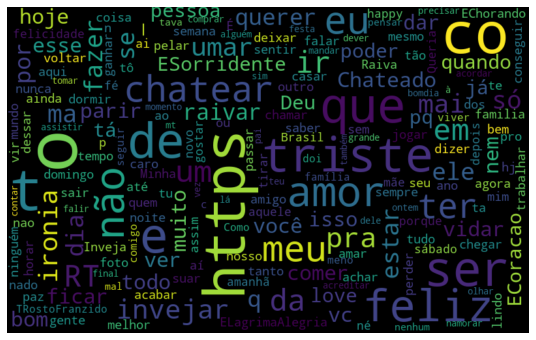

In [9]:
# Pegando matriz e textos tratados
sparse_matrix_imdb, transform_Texts = prepro_imdb.preprocess()

In [10]:
le = preprocessing.LabelEncoder()
le.fit(df['hashtagsearch'].unique())
df['hashtagsearch'] = le.transform(df['hashtagsearch'])

In [11]:
# Train and valid
X_train, X_valid, y_train, y_valid = train_test_split(sparse_matrix_imdb, df['hashtagsearch'], test_size=0.3)

## Chamando os modelos

In [16]:
models = [
    ("RandomForest", RandomForestClassifier()),
    ("LogisticRegression", LogisticRegression(max_iter = 10000)),
    ("SVC", SVC()),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("MultinomialNB", MultinomialNB())
]

In [17]:
mod = classification_models(X_train, y_train, X_valid, y_valid, models)

In [18]:
results = mod.apply_model()

In [19]:
results

{'RandomForest': 0.2715902322811197,
 'LogisticRegression': 0.2590827873734366,
 'SVC': 0.26503871351995234,
 'KNeighborsClassifier': 0.2337701012507445,
 'MultinomialNB': 0.2611673615247171}